# Ejercicios

In [1]:
import numpy as np

---
## Convoluciones de arrays

:::{exercise}
:label: chapther2-convolution

Dadas dos funciones de variable real $f$ y $g$, definimos la [**convolución**](https://en.wikipedia.org/wiki/Convolution) de $f$ y $g$ como

$$
(f*g)(x) = \int_\mathbb{R} f(t)g(x - t)dt.
$$

La versión discreta de la anterior definición puede ser la siguiente. Datos $f=(f_0, \dots, f_{n-1})$ y $g=(g_0, \dots, g_{m-1})$ dos vectores (representados por arrays unidimensionales) de tamaño $n$ y $m$, respectivamente, definimos el array `conv` de dimensión `n + m - 1` cuya componente $k$ vale

$$
\sum_{i + m -1 = k + j}f_ig_j
$$

para $0 \leq k \leq n + m - 1$.

Crea una función `conv` que tome como inputs dos arrays y devuelva la convolución de ambos. Por ejemplo

```
arr1 = np.arange(10)
arr2 = np.arange(5)
conv(arr1, arr2)
>>> [ 0  4 11 20 30 40 50 60 70 80 50 26  9  0]
```

:::

In [15]:
def conv(f, g):
  n = f.size
  m = g.size
  conv = np.zeros(n + m - 1)
  for k in range(n + m - 1):
    terms = []
    for i in range(n):
      for j in range(m):
        if i + m -1 == k + j:
          terms.append(f[i]*g[j])
    conv[k] = sum(terms)
  return conv

f = np.arange(10)
g = np.arange(5)

conv(f, g)

array([ 0.,  4., 11., 20., 30., 40., 50., 60., 70., 80., 50., 26.,  9.,
        0.])

---
## Procesando imágenes con numpy

:::{exercise}
:label: chapter2-images

Una de las posibles técnicas que existen para comprimir una imagen es utilizar [la descomposición SVD (Singular Value Decomposition)](https://en.wikipedia.org/wiki/Singular_value_decomposition) que nos permite expresar una matrix $A$ de dimensiones $n\times m$ como un producto

$$
A = U \Sigma V^t
$$

donde $U$ y $V$ son cuadradas de dimensiones $n$ y $m$ respectivamente y $\Sigma$ es diagonal y está formada por los [valores singulares](https://en.wikipedia.org/wiki/Singular_value) de $A$ ordenados de mayor a menor (siempre son números reales y positivos).

Recuerda que una imagen no es más que un conjunto de 3 matrices, cada una representando la intensidad de la grilla de píxeles para cada color (rojo, verde y azul). Una forma de comprimir una imagen consiste en quedarse con los $k$ primeros valores singulares para cada color e intercambiar $k$ por una se las dimensiones que representan el alto o el ancho de la imagen.

Crea una función `aproxima_img` que tome un array de dimensión $(3, h, w)$ y devuelva otra imagen aproximada de dimensión $(3, h, w)$ utilizando los k primeros valores singulares. Para ello,
1. Utiliza la función `scipy.misc.face` para generar una imagen de prueba, o también puedes importar una utilizando `im = cv2.imread("img.jpg")`. Puedes visualizar imágenes con este formato a través del la función `imshow` de `matplotlib.pyplot` (a veces hay que cambiar de orden los canales).
2. Utiliza la función `svd` de `np.linalg` para realizar la descomposición SVD. Mucho cuidado con las dimensiones que espera la función.
3. Otras funciones que pueden ser útiles para el ejercicio: `np.transpose`, `np.zeros`, `np.fill_diagonal`, `np.clip`.

:::

<ipython-input-16-0e141452b3e7>:4: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  im = scipy.misc.face()


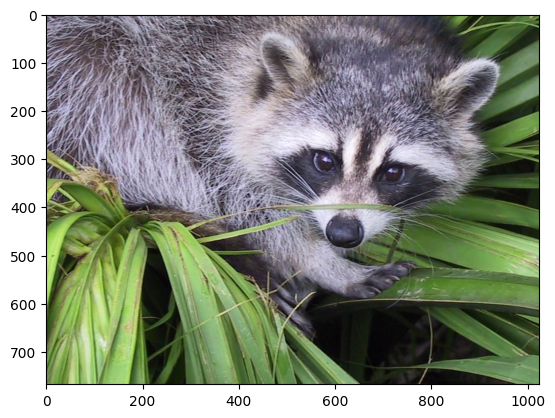

In [16]:
import scipy
import matplotlib.pyplot as plt
# DeprecationWarning que nos sale es para advertirnos que si salimos de aqui esto desaparecerá

im = scipy.misc.face()
plt.imshow(im)

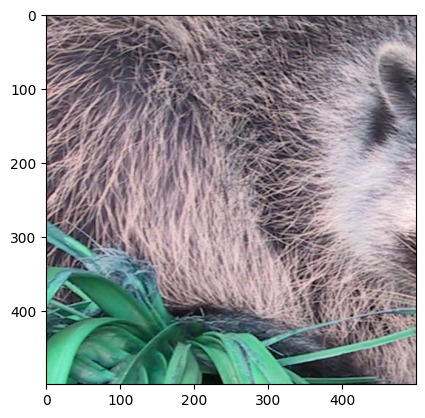

In [25]:
im.shape
plt.imshow(im[:500, :500, [2, 1, 0]])  #los :500 es para coger un cacho de la imagen
# el [2, 1, 0] es para cambiar de orden el color de los pixeles

In [28]:
im.max() # son 255 el maximo de pixeles

255

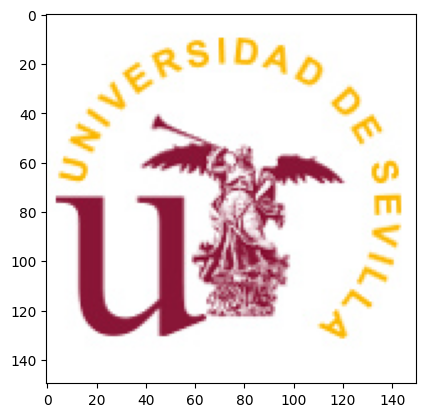

In [30]:
import cv2  # esto es para cargar una imagen desde el ordenador

im_imagen = cv2.imread("Sello us.jpg")

plt.imshow(im_imagen)  # si hemos hecho modificacion de colores habria que hacerlo de nuevo para ver bien la foto
plt.imshow(im_imagen[:, :, [2, 1, 0]])

In [42]:
h, w, _ = im_imagen.shape

In [45]:
from numpy.linalg import svd

im_imagen_modificada = np.transpose(im_imagen, (2, 0, 1))

U, s, Vh = svd(im_imagen_modificada) # 3 desomposiciones svd

<ipython-input-51-1137e48cc5c8>:9: RuntimeWarning: divide by zero encountered in divide
  im_comprimida = (im_comprimida - im_comprimida.min()) / (im_comprimida.max() - im_comprimida)


(3, 150, 150)
(3, 150)
(3, 150, 150)


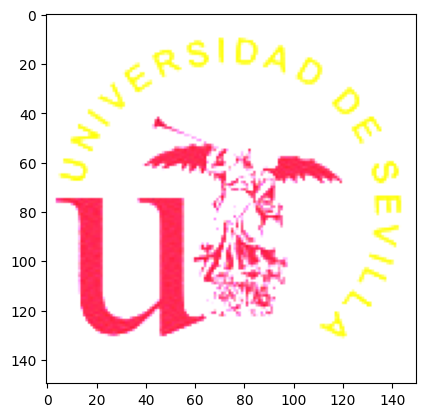

In [51]:
print(U.shape)
print(s.shape)
print(Vh.shape)
k = 50
S = np.zeros((3, w, w))
for c in range(3):
  np.fill_diagonal(S[c], s[c])
im_comprimida = U[:, :, :k] @ S[:, :k, :] @ Vh
im_comprimida = (im_comprimida - im_comprimida.min()) / (im_comprimida.max() - im_comprimida)
im_final = np.transpose(im_comprimida, (1, 2, 0))[:, :, [2, 1, 0]]
plt.imshow(im_final)

:::{exercise}
:label: chapter2-images-convolution

Importa una imagen de tu elección utilizando la función `imread` de la librería `cv2`. Crea un array `kernel` de dimensión $(n, n)$ y realiza la convolución de tu imagen con `kernel` mediante la función [`scipy.signal.convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) (parámetro `mode='same'`). Si tu imagen tiene varios canales para los colores, aplica el mismo kernel a cada canal.

Algunos ejemplos interesantes de kernel pueden ser los siguientes:

- $n = 3$ con valores

$$
\begin{pmatrix}
-3 & 0 & 3\\
-10 & 0 & 10\\
-3 & 0 & 3
\end{pmatrix}
$$

- transpuesta del anterior,

$$
\begin{pmatrix}
-3 & -10 & -3\\
0 & 0 & 0\\
3 & 10 & 3
\end{pmatrix}
$$

- $n \approx 50$, generados con `scipy.signal.windows.gaussian` (puedes utilizar la función `np.outer` para realizar un producto exterior)

- Operador complejo de Sharr
```
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],

                   [-10+0j, 0+ 0j, +10 +0j],

                   [ -3+3j, 0+10j,  +3 +3j]])
```
Puedes visualizar las imágenes con `matplotlib.pyplot.imshow`.

:::

(150, 150)

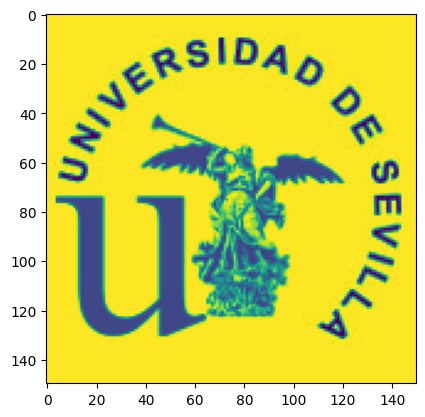

In [52]:
imagen = im_imagen[:, :, 0]
plt.imshow(imagen)
imagen.shape

In [66]:
import scipy

kernel = np.array([
    [-3, 0 ,3],
    [-10, 0, 10],
    [-3, 0, 3],
])
ret = scipy.signal.convolve2d(imagen, kernel.T) # el .T es para las aristas horizontales
# el kernel nos permite coger las aristas

In [60]:
print(ret.shape)
print(imagen.shape)

(152, 152)
(150, 150)


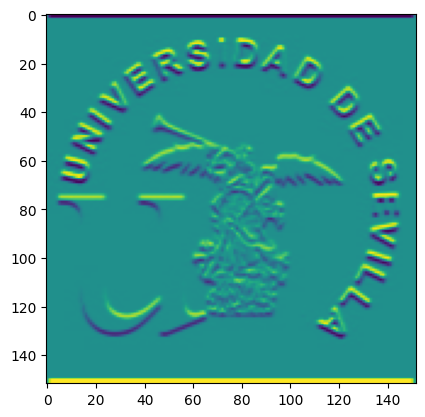

In [67]:
plt.imshow(ret)

In [70]:
import scipy

kernel = np.array([
    [-3, 0 ,3],
    [-10, 0, 10],
    [-3, 0, 3],
])
ret = np.zeros(im_imagen.shape)

# el kernel nos permite coger las aristas
for i in range(3):
  ret[:, :, i] = scipy.signal.convolve2d(
      im_imagen[:, :, i], kernel.T,  # el .T es para las aristas horizontales
      mode = "same")

(150, 150, 3)


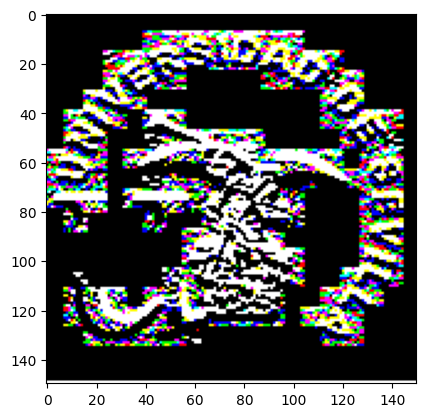

In [71]:
print(ret.shape)
plt.imshow(ret)

In [79]:
# Vamos a crear un kernel alternativo
n = 100
v = scipy.signal.windows.gaussian(n, 1)
kernel = np.outer(v,v)

In [75]:
print(v)

[4.54327075e-131 1.20347254e-120 1.17276033e-110 4.20424358e-101
 5.54462259e-092 2.69005790e-083 4.80127724e-075 3.15251716e-067
 7.61489029e-060 6.76667568e-053 2.21203803e-046 2.66020642e-040
 1.17691094e-034 1.91547895e-029 1.14687658e-024 2.52616378e-020
 2.04697171e-016 6.10193668e-013 6.69158609e-010 2.69957850e-007
 4.00652974e-005 2.18749112e-003 4.39369336e-002 3.24652467e-001
 8.82496903e-001 8.82496903e-001 3.24652467e-001 4.39369336e-002
 2.18749112e-003 4.00652974e-005 2.69957850e-007 6.69158609e-010
 6.10193668e-013 2.04697171e-016 2.52616378e-020 1.14687658e-024
 1.91547895e-029 1.17691094e-034 2.66020642e-040 2.21203803e-046
 6.76667568e-053 7.61489029e-060 3.15251716e-067 4.80127724e-075
 2.69005790e-083 5.54462259e-092 4.20424358e-101 1.17276033e-110
 1.20347254e-120 4.54327075e-131]


In [80]:
import scipy

for i in range(3):
  ret[:, :, i] = scipy.signal.convolve2d(
      im_imagen[:, :, i], kernel.T,  # el .T es para las aristas horizontales
      mode = "same")

<ipython-input-81-7429828df701>:1: RuntimeWarning: divide by zero encountered in divide
  ret = (ret - ret.min()) / (ret.max() - ret)


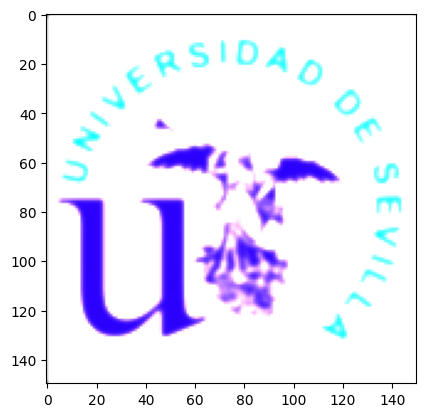

In [81]:
ret = (ret - ret.min()) / (ret.max() - ret)
plt.imshow(ret)

---
## Regresión Lineal

:::{exercise}
:label: chapter2-linear-regression

Considera un modelo de regresión lineal que consiste en estimar una variable $y$ como una suma ponderada de un cojunto de variables regresoras

$$
\hat{y} = \theta_0 + \theta_1x_1 + \dots \theta_nx_n
$$

donde

- $n$ es el conjunto de variables regresoras o *features*, $x_i$ el valor correspondiente.
- $\hat{y}$ es el valor predicho.
- $\theta_i$ son parámetros del modelo para $0 \leq i \leq n$.  

Podemos expresar dicha ecuación en formato matricial como

$$
\hat{y} =
\begin{pmatrix}
1 & x_1 & \cdots & x_n
\end{pmatrix}
\begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
=
\boldsymbol{x} \cdot \boldsymbol{\theta}.
$$

Dado un conjunto de $m$ observaciones, nuestro objetivo es encontrar $\boldsymbol{\theta}$ tal que se minimice nuestra aproximación lineal en términos de menores cuadrados

$$
\frac{1}{m}\sum_{i=1}^{m}
(\boldsymbol{x}_i \cdot \boldsymbol{\theta} - y_i)^2.
$$

El valor óptimo de los parámetros se puede calcular directamente

$$
\hat{\theta} = (\boldsymbol{X}^t\boldsymbol{X})^{-1}\boldsymbol{X}^ty
$$

donde

$$
\boldsymbol{X} =
\begin{pmatrix}
1 & x_{11} & \cdots & x_{1n} \\
1 & x_{21} & \cdots & x_{2n} \\
\vdots & \vdots & \cdots & \vdots \\
1 & x_{m1} & \cdots & x_{mn}
\end{pmatrix}
$$

es el conjunto de observaciones de las variables regresoras e

$$
\hat{y}=
\begin{pmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{pmatrix}
$$

es el conjunto de observaciones de la variable objetivo.


Crea una clase `RegresionLineal` con dos métodos,
- `entrena`: toma como parámetros `X` e `y`, observaciones de las variables regresoras y objetivo, respectivamente, y calcula los coeficientes de la regresión lineal y los guarda en un atributo `_theta`.
- `transforma`: toma como parámetro una serie de observaciones nuevas `X` y devuelve una estimación `y_hat` de la varible objetivo utilizando el método descrito anteriormente.

Funciones que puede ser de ayuda: `np.linalg.inv`, `np.linalg.pinv`, `np.vstack`, `np.hstack`.

:::

In [114]:
# np.vstack es para apilar filas de vectores o matrices incluso, 1 encima de otra
# np.hstack lo que hace es poner todas las filas en la misma fila de numeros

class RegresionLineal:

  def entrena(self, X: np.ndarray, y: np.ndarray):
    self._theta = np.linalg.inv(X.T @ X) @ X.T @ y

  def transforma(self, X: np.ndarray):
    y_hat = X @ self._theta
    return y_hat

In [126]:
n = 1
m = 50
X = np.linspace(-1, 1, m)
y = -5 + 8*X + np.random.randn(m) # hay que definirlas antes de hacer reshape
X = X.reshape((m,n)) #reshape para pasar de filas a columnas
X = np.hstack((np.ones(m).reshape(m,1), X))

In [112]:
print(X.shape)
print(y.shape)

(50, 2)
(50,)


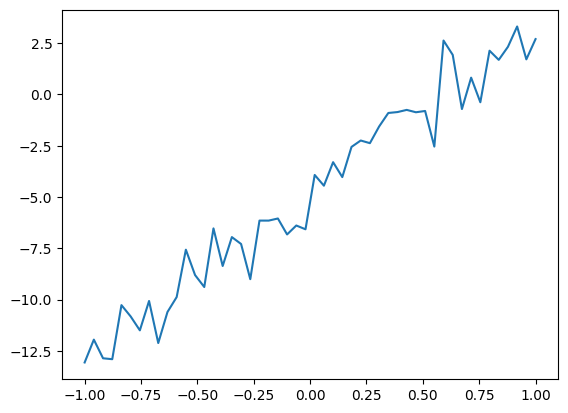

In [120]:
import matplotlib

plt.plot(X[:, 1], y)  # "*" para verlo con estrellitas

In [121]:
regresion_lineal = RegresionLineal()

regresion_lineal.entrena(X, y)
regresion_lineal._theta  # theta no dice la pendiente = 8

array([-4.82484066,  8.11640797])

In [122]:
regresion_lineal.transforma(X)

array([-12.94124863, -12.60996668, -12.27868472, -11.94740276,
       -11.6161208 , -11.28483884, -10.95355689, -10.62227493,
       -10.29099297,  -9.95971101,  -9.62842905,  -9.2971471 ,
        -8.96586514,  -8.63458318,  -8.30330122,  -7.97201926,
        -7.64073731,  -7.30945535,  -6.97817339,  -6.64689143,
        -6.31560947,  -5.98432752,  -5.65304556,  -5.3217636 ,
        -4.99048164,  -4.65919968,  -4.32791773,  -3.99663577,
        -3.66535381,  -3.33407185,  -3.00278989,  -2.67150794,
        -2.34022598,  -2.00894402,  -1.67766206,  -1.3463801 ,
        -1.01509815,  -0.68381619,  -0.35253423,  -0.02125227,
         0.31002969,   0.64131164,   0.9725936 ,   1.30387556,
         1.63515752,   1.96643948,   2.29772143,   2.62900339,
         2.96028535,   3.29156731])